# GARCH Analysis

#### Data Loading and Visualizations

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from arch import arch_model

# Set visualization style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 4)

# %% [markdown]
# ## 1. Load and Preprocess the Data
# 
# We load the training and testing CSV files. The Date column is parsed and set as the index.
# Ensure that the data is sorted chronologically.

# %% [code]
# Define file paths for training and testing data
train_file = "train_data.csv"
test_file = "test_data.csv"

# Load training data
try:
    train_df = pd.read_csv(train_file, parse_dates=['Date'])
    train_df.sort_values("Date", inplace=True)
    train_df.set_index("Date", inplace=True)
    print("Training Data:")
    display(train_df.head())
except FileNotFoundError:
    print(f"File {train_file} not found. Please ensure it is in the working directory.")

# Load testing data
try:
    test_df = pd.read_csv(test_file, parse_dates=['Date'])
    test_df.sort_values("Date", inplace=True)
    test_df.set_index("Date", inplace=True)
    print("Testing Data:")
    display(test_df.head())
except FileNotFoundError:
    print(f"File {test_file} not found. Please ensure it is in the working directory.")

Training Data:


,Close,Open,High,Low,Log_Returns
Date,,,,,
2020-03-09,2746.56,2863.89,2863.89,2734.43,-0.079010
2020-03-10,2882.23,2813.48,2882.59,2734.00,0.048215
2020-03-11,2741.38,2825.60,2825.60,2707.22,-0.050103
2020-03-12,2480.64,2630.86,2660.95,2478.86,-0.099945
2020-03-13,2711.02,2569.99,2711.33,2492.37,0.088808


Testing Data:


,Close,Open,High,Low,Log_Returns
Date,,,,,
2025-02-05,6061.48,6020.45,6062.86,6007.06,0.003901
2025-02-06,6083.57,6072.22,6084.03,6046.83,0.003638
2025-02-07,6025.99,6083.13,6101.28,6019.96,-0.009510
2025-02-10,6066.44,6046.40,6073.38,6044.84,0.006690
2025-02-11,6068.50,6049.32,6076.28,6042.34,0.000340


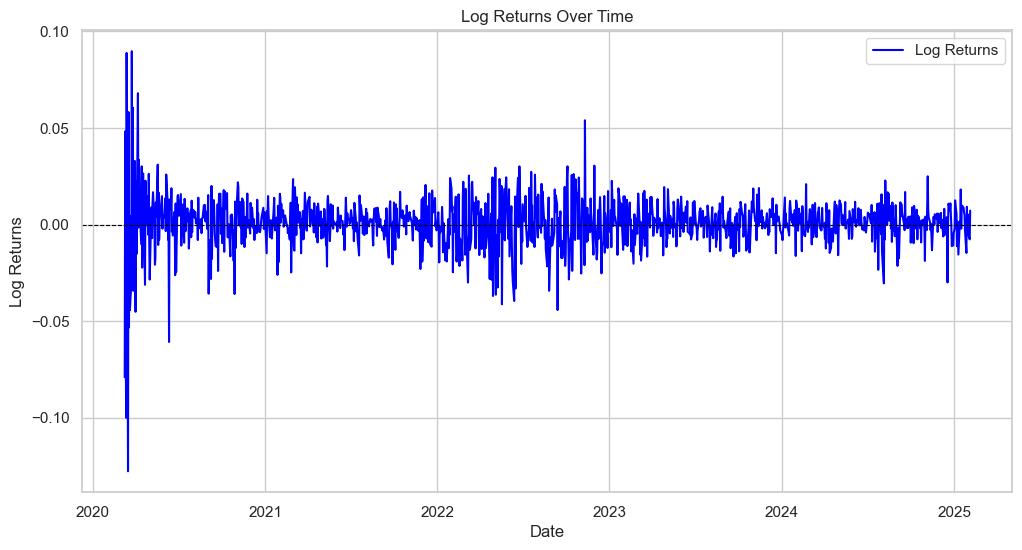

In [2]:
# Plot log returns
plt.figure(figsize=(12, 6))
plt.plot(train_df.index, train_df['Log_Returns'], label='Log Returns', color='blue')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.title('Log Returns Over Time')
plt.legend()
plt.show()

Forklaring

### Fitter modeller vha Grid Search

In [4]:
results = []
# Candidate orders and distributions
orders = [(1, 1), (1, 2), (2, 1)]
distributions = ['normal', 't', 'skewt']

train_data = train_df["Log_Returns"]

# Loop over each candidate configuration
for p, q in orders:
    for dist in distributions:
        try:
            model = arch_model(train_data, vol='GARCH', p=p, q=q, dist=dist)
            res = model.fit(disp='off')
            results.append({
                'order': f"GARCH({p},{q})",
                'distribution': dist,
                'AIC': res.aic,
                'BIC': res.bic,
                'LogLikelihood': res.loglikelihood
            })
            print(f"Fitted GARCH({p},{q}) with {dist} distribution: AIC={res.aic:.2f}, BIC={res.bic:.2f}")
        except Exception as e:
            print(f"Model GARCH({p},{q}) with {dist} failed: {e}")

# Convert the results to a DataFrame for easy analysis
results_df = pd.DataFrame(results)
results_df

c:\Users\cleme\anaconda3\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001768. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\cleme\anaconda3\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001768. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\cleme\anaconda3\Lib\site-packages\arch\univariate\base.py:309: Data

Fitted GARCH(1,1) with normal distribution: AIC=-7796.94, BIC=-7776.47
Fitted GARCH(1,1) with t distribution: AIC=-5402.36, BIC=-5376.76
Fitted GARCH(1,1) with skewt distribution: AIC=53491.81, BIC=53522.52
Fitted GARCH(1,2) with normal distribution: AIC=-7785.94, BIC=-7760.35
Fitted GARCH(1,2) with t distribution: AIC=-4863.31, BIC=-4832.59
Fitted GARCH(1,2) with skewt distribution: AIC=237850.94, BIC=237886.77
Fitted GARCH(2,1) with normal distribution: AIC=-7794.07, BIC=-7768.48


c:\Users\cleme\anaconda3\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001768. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\cleme\anaconda3\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001768. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\cleme\anaconda3\Lib\site-packages\arch\univariate\base.py:309: Data

Fitted GARCH(2,1) with t distribution: AIC=-5569.08, BIC=-5538.37
Fitted GARCH(2,1) with skewt distribution: AIC=-2144.50, BIC=-2108.67


c:\Users\cleme\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
c:\Users\cleme\anaconda3\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001768. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


,order,distribution,AIC,BIC,LogLikelihood
0,"GARCH(1,1)",normal,-7796.943836,-7776.468531,3902.471918
1,"GARCH(1,1)",t,-5402.358850,-5376.764718,2706.179425
2,"GARCH(1,1)",skewt,53491.807889,53522.520847,-26739.903945
3,"GARCH(1,2)",normal,-7785.940213,-7760.346082,3897.970106
4,"GARCH(1,2)",t,-4863.305276,-4832.592319,2437.652638
5,"GARCH(1,2)",skewt,237850.937874,237886.769657,-118918.468937
6,"GARCH(2,1)",normal,-7794.069346,-7768.475215,3902.034673
7,"GARCH(2,1)",t,-5569.080649,-5538.367691,2790.540324
8,"GARCH(2,1)",skewt,-2144.498781,-2108.666997,1079.249390


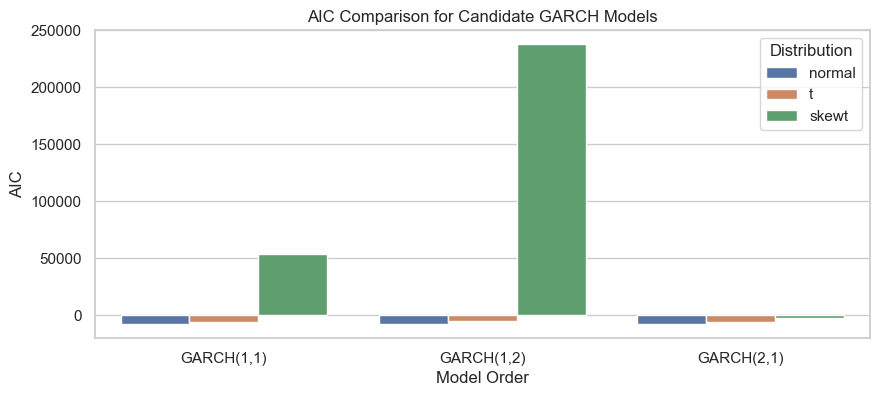

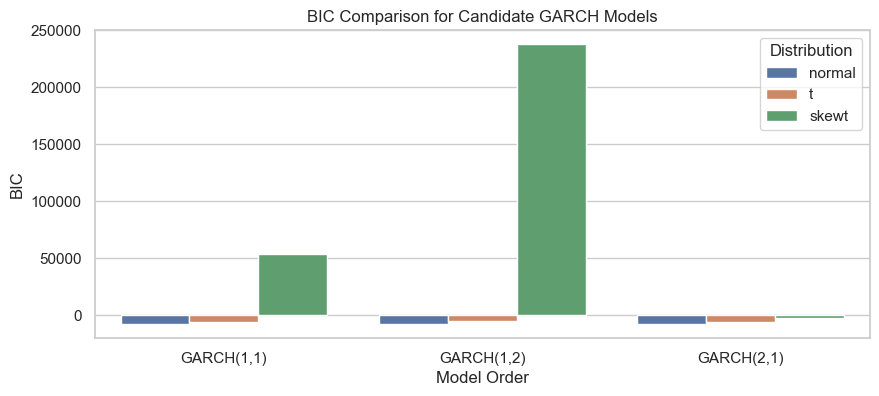

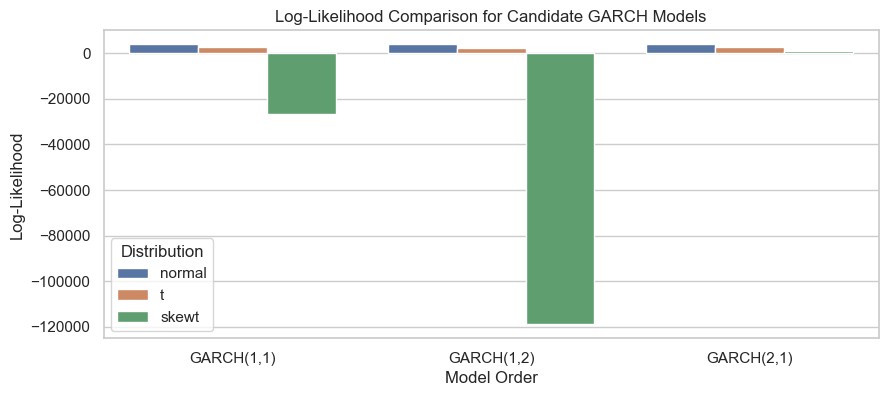

In [5]:
# ## 3. Visualize Model Comparison Metrics
# 
# We now plot the AIC, BIC, and log-likelihood values for each candidate model.
# These plots will help us compare model performance visually.

# %% [code]
# Plot AIC values
plt.figure()
sns.barplot(x="order", y="AIC", hue="distribution", data=results_df)
plt.title("AIC Comparison for Candidate GARCH Models")
plt.ylabel("AIC")
plt.xlabel("Model Order")
plt.legend(title="Distribution")
plt.show()

# %% [code]
# Plot BIC values
plt.figure()
sns.barplot(x="order", y="BIC", hue="distribution", data=results_df)
plt.title("BIC Comparison for Candidate GARCH Models")
plt.ylabel("BIC")
plt.xlabel("Model Order")
plt.legend(title="Distribution")
plt.show()

# %% [code]
# Plot Log-Likelihood values
plt.figure()
sns.barplot(x="order", y="LogLikelihood", hue="distribution", data=results_df)
plt.title("Log-Likelihood Comparison for Candidate GARCH Models")
plt.ylabel("Log-Likelihood")
plt.xlabel("Model Order")
plt.legend(title="Distribution")
plt.show()

Basert på disse resultatene velger vi: GARCH(1,1) with normal distribution
Lowest AIC and BIC

Første iterasjon av kode: Ikke så viktig

Training Data:


,Close,Open,High,Low,Log_Returns
Date,,,,,
2020-03-09,2746.56,2863.89,2863.89,2734.43,-0.079010
2020-03-10,2882.23,2813.48,2882.59,2734.00,0.048215
2020-03-11,2741.38,2825.60,2825.60,2707.22,-0.050103
2020-03-12,2480.64,2630.86,2660.95,2478.86,-0.099945
2020-03-13,2711.02,2569.99,2711.33,2492.37,0.088808


Testing Data:


,Close,Open,High,Low,Log_Returns
Date,,,,,
2025-02-05,6061.48,6020.45,6062.86,6007.06,0.003901
2025-02-06,6083.57,6072.22,6084.03,6046.83,0.003638
2025-02-07,6025.99,6083.13,6101.28,6019.96,-0.009510
2025-02-10,6066.44,6046.40,6073.38,6044.84,0.006690
2025-02-11,6068.50,6049.32,6076.28,6042.34,0.000340


                     Constant Mean - GARCH Model Results                      
Dep. Variable:            Log_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                3902.47
Distribution:                  Normal   AIC:                          -7796.94
Method:            Maximum Likelihood   BIC:                          -7776.47
                                        No. Observations:                 1235
Date:                Thu, Mar 06 2025   Df Residuals:                     1234
Time:                        10:56:26   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         7.8793e-04  2.832e-05     27.818 2.614e-170 [7.

c:\Users\cleme\anaconda3\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001768. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


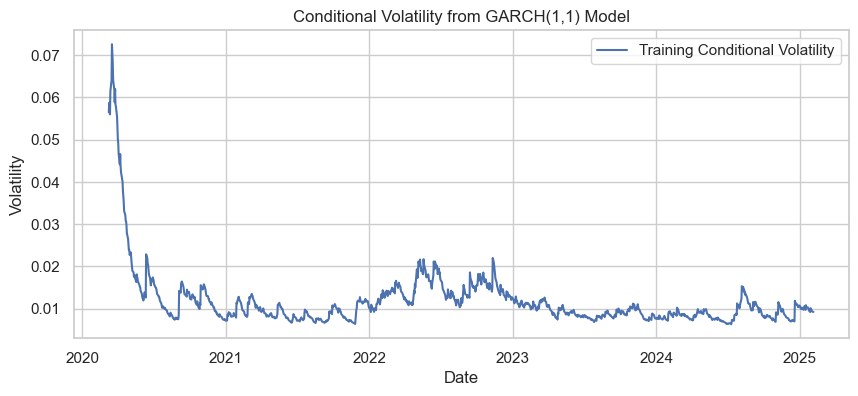

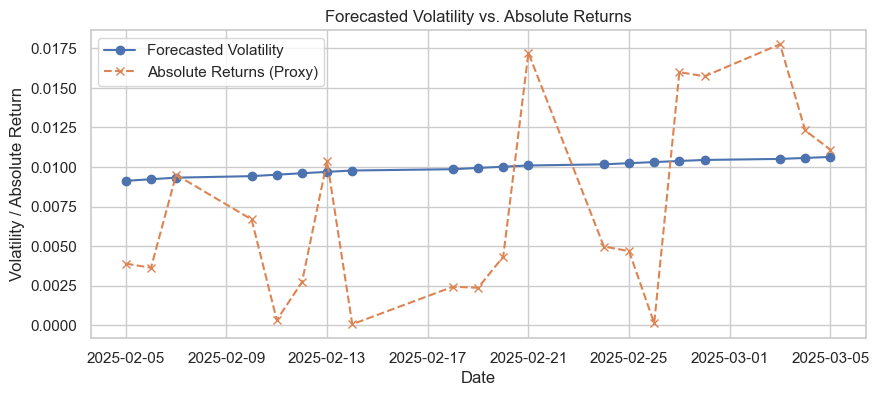

In [ ]:


# %% [markdown]
# ## 2. Fit the GARCH(1,1) Model on Training Data
# 
# We fit a GARCH(1,1) model to the log returns in the training dataset.
# The model assumes a normal distribution for the error terms.
# After fitting, we print the model summary.

# %% [code]
# Specify and fit the GARCH(1,1) model on the training data
garch_model = arch_model(train_df["Log_Returns"], vol='GARCH', p=1, q=1, dist='normal')
garch_result = garch_model.fit(disp='off')
print(garch_result.summary())

# %% [markdown]
# ## 3. Forecast Volatility Over the Test Period
# 
# We forecast the variance (and corresponding volatility) for a horizon equal to the number of observations in the test dataset.
# This forecast represents the model’s expectation of volatility during the test period.

# %% [code]
# Determine forecast horizon as the length of the test dataset
forecast_horizon = len(test_df)

# Generate forecasts
forecasts = garch_result.forecast(horizon=forecast_horizon, reindex=False)
# Get the forecasted variance for the last available period in the training data
forecasted_variance = forecasts.variance.iloc[-1]
forecasted_volatility = np.sqrt(forecasted_variance)

print("Forecasted Volatility:")
print(forecasted_volatility)

# %% [markdown]
# ## 4. Visualize Conditional Volatility and Forecast
# 
# We plot the estimated conditional volatility from the model along with the forecasted volatility for the test period.
# For comparison, we also plot the realized absolute returns from the test set as a rough proxy for actual volatility.

# %% [code]
# Plot the estimated conditional volatility from the training period
plt.figure()
plt.plot(garch_result.conditional_volatility, label='Training Conditional Volatility')
plt.title("Conditional Volatility from GARCH(1,1) Model")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()

# Plot forecasted volatility over the test period
# Create a date range for the forecast (using the test data index)
forecast_dates = test_df.index

plt.figure()
plt.plot(forecast_dates, forecasted_volatility, marker='o', linestyle='-', label='Forecasted Volatility')
plt.plot(test_df.index, np.abs(test_df["Log_Returns"]), marker='x', linestyle='--', label='Absolute Returns (Proxy)')
plt.title("Forecasted Volatility vs. Absolute Returns")
plt.xlabel("Date")
plt.ylabel("Volatility / Absolute Return")
plt.legend()
plt.show()